# Housing Price Prediction Model

This notebook demonstrates a comprehensive approach to building a housing price prediction model using various machine learning techniques. We'll walk through data preprocessing, feature engineering, model building, and evaluation.

## 1. Data Loading and Exploration

First, let's load the dataset and explore its basic characteristics.

Dataset shape: (8774, 32)

First few rows:


,price,property_type,bedrooms,bathrooms,total_rooms,living_area,land_area,has_climatisation,has_parabole_tv,has_pool,...,has_furnished,has_central_heating,has_kitchen_equipped,is_house,has_many_bedrooms,many_bathrooms,has_many_total_rooms,area_ratio,neighborhood_encoded,city_encoded
0,360000.0,Appartement,3,1,6,110.0,110.0,0,0,0,...,0,0,0,0.0,0,0,0,1.0,605527.358190,421175.174172
1,320000.0,Appartement,1,1,4,53.0,53.0,0,0,0,...,0,0,0,0.0,0,0,0,1.0,605527.358190,421175.174172
2,422000.0,Appartement,2,2,6,125.0,125.0,1,1,0,...,0,1,1,0.0,0,0,0,1.0,478486.511726,427787.785346
3,245000.0,Appartement,1,1,4,74.0,74.0,1,1,0,...,0,1,1,0.0,0,0,0,1.0,369792.118241,458175.619915
4,520000.0,Appartement,3,2,7,152.0,152.0,1,1,0,...,0,1,1,0.0,0,0,0,1.0,520341.334729,421175.174172



Missing values count:
Series([], dtype: int64)

Basic statistics for numeric columns:


,price,bedrooms,bathrooms,total_rooms,living_area,land_area,has_climatisation,has_parabole_tv,has_pool,has_handicapped_access,...,has_furnished,has_central_heating,has_kitchen_equipped,is_house,has_many_bedrooms,many_bathrooms,has_many_total_rooms,area_ratio,neighborhood_encoded,city_encoded
count,8.774000e+03,8774.000000,8774.000000,8774.000000,8774.000000,8774.000000,8774.000000,8774.000000,8774.000000,8774.000000,...,8774.000000,8774.000000,8774.000000,8774.000000,8774.000000,8774.000000,8774.000000,8774.000000,8774.000000,8774.000000
mean,4.088509e+05,3.189537,1.697401,6.679508,255.359432,409.235311,0.364942,0.195692,0.139275,0.062685,...,0.073399,0.327445,0.343515,0.539321,0.010599,0.006041,0.133576,1.899921,411822.881046,409750.023520
std,3.107667e+05,1.644301,0.993057,1.861522,3142.513243,5742.828931,0.481441,0.396755,0.346253,0.242410,...,0.260805,0.469308,0.474909,0.498480,0.102413,0.077490,0.340216,15.231317,119982.634985,55469.098486
min,4.500000e+04,1.000000,1.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000380,228600.959334,227858.899218
25%,1.900000e+05,2.000000,1.000000,5.000000,100.000000,105.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.733333,327412.388962,363576.044176
50%,3.000000e+05,3.000000,1.000000,6.000000,140.000000,156.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,384159.091579,427787.785346
75%,5.400000e+05,4.000000,2.000000,8.000000,238.000000,320.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,505122.757439,458175.619915
max,1.700000e+06,10.000000,6.000000,10.000000,220000.000000,420000.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,686.714286,819236.371223,583526.220513


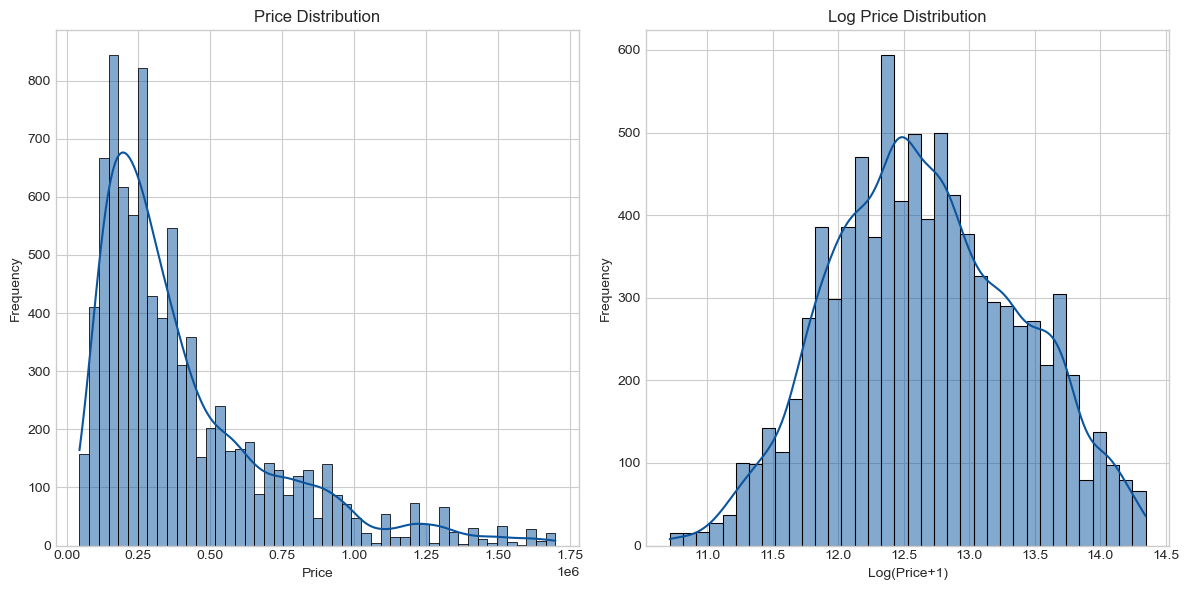

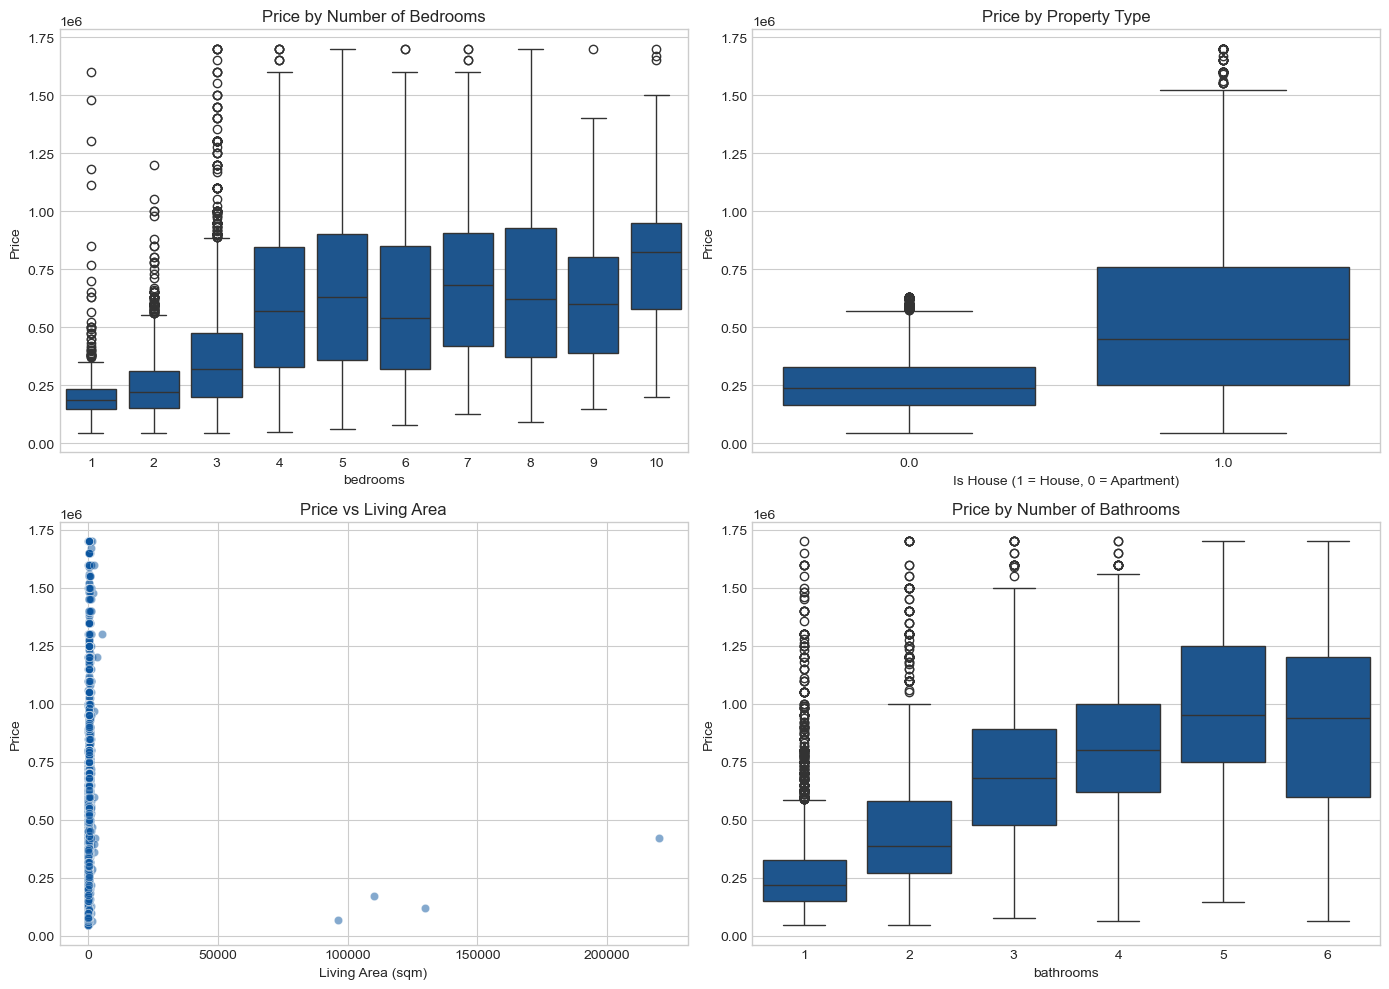

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
try:
    plt.style.use('seaborn-v0_8-whitegrid')  # For newer matplotlib versions
except:
    try:
        plt.style.use('seaborn-whitegrid')  # For older versions
    except:
        plt.style.use('default')  # Fallback option
        
sns.set_palette('Blues_r')
plt.rcParams['figure.figsize'] = (12, 8)

# Load the dataset
df = pd.read_csv('menzli_modeling1.csv')

# Display basic info
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())

# Check for missing values
print("\nMissing values count:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Display basic statistics
print("\nBasic statistics for numeric columns:")
display(df.describe())

# Plot the price distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True)
plt.title('Log Price Distribution')
plt.xlabel('Log(Price+1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot price vs. key features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Price vs bedrooms
sns.boxplot(x='bedrooms', y='price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Price by Number of Bedrooms')
axes[0, 0].set_ylabel('Price')

# Price vs is_house
sns.boxplot(x='is_house', y='price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Price by Property Type')
axes[0, 1].set_xlabel('Is House (1 = House, 0 = Apartment)')
axes[0, 1].set_ylabel('Price')

# Price vs living area
sns.scatterplot(x='living_area', y='price', data=df, alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Price vs Living Area')
axes[1, 0].set_xlabel('Living Area (sqm)')
axes[1, 0].set_ylabel('Price')

# Price vs bathrooms
sns.boxplot(x='bathrooms', y='price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Price by Number of Bathrooms')
axes[1, 1].set_ylabel('Price')

plt.tight_layout()
plt.show()

### Exploration Insights:
- The dataset contains 8,774 properties with 32 columns
- Price distribution is right-skewed, suggesting log transformation would be appropriate
- There's a clear relationship between price and property type (house vs apartment)
- Living area shows a strong positive correlation with price
- Properties with more bedrooms and bathrooms tend to have higher prices
- Some outliers exist in the price distribution

## 2. Data Preprocessing

Let's preprocess the data to prepare it for modeling.

In [5]:
def preprocess_data(df):
    # Make a copy to avoid modifying the original dataframe
    df_processed = df.copy()
    
    # Handle missing values
    for col in df_processed.columns:
        if df_processed[col].isnull().sum() > 0:
            if df_processed[col].dtype == 'object':
                df_processed[col].fillna('Unknown', inplace=True)
            else:
                df_processed[col].fillna(df_processed[col].median(), inplace=True)
    
    # Remove property_type since we have is_house column
    if 'property_type' in df_processed.columns:
        df_processed.drop('property_type', axis=1, inplace=True)
    
    # Handle outliers in feature variables (not price)
    for col in ['living_area', 'land_area', 'bedrooms', 'bathrooms', 'total_rooms']:
        if col in df_processed.columns:
            q1 = df_processed[col].quantile(0.01)
            q3 = df_processed[col].quantile(0.99)
            iqr = q3 - q1
            lower_bound = max(0, q1 - 1.5 * iqr)  # Ensure non-negative values
            upper_bound = q3 + 1.5 * iqr
            df_processed[col] = df_processed[col].clip(lower_bound, upper_bound)
    
    return df_processed

# Preprocess data
print("Preprocessing data...")
df_processed = preprocess_data(df)

# Compare before and after
print("\nBefore preprocessing:")
display(df[['living_area', 'land_area', 'bedrooms', 'bathrooms', 'total_rooms']].describe())

print("\nAfter preprocessing:")
display(df_processed[['living_area', 'land_area', 'bedrooms', 'bathrooms', 'total_rooms']].describe())

# Verify no missing values
print(f"\nMissing values after preprocessing: {df_processed.isnull().sum().sum()}")

Preprocessing data...

Before preprocessing:


,living_area,land_area,bedrooms,bathrooms,total_rooms
count,8774.000000,8774.000000,8774.000000,8774.000000,8774.000000
mean,255.359432,409.235311,3.189537,1.697401,6.679508
std,3142.513243,5742.828931,1.644301,0.993057,1.861522
min,1.000000,1.000000,1.000000,1.000000,4.000000
25%,100.000000,105.000000,2.000000,1.000000,5.000000
50%,140.000000,156.000000,3.000000,1.000000,6.000000
75%,238.000000,320.000000,4.000000,2.000000,8.000000
max,220000.000000,420000.000000,10.000000,6.000000,10.000000



After preprocessing:


,living_area,land_area,bedrooms,bathrooms,total_rooms
count,8774.000000,8774.000000,8774.000000,8774.000000,8774.000000
mean,191.835937,274.801613,3.189537,1.697401,6.679508
std,154.038254,377.564447,1.644301,0.993057,1.861522
min,1.000000,1.000000,1.000000,1.000000,4.000000
25%,100.000000,105.000000,2.000000,1.000000,5.000000
50%,140.000000,156.000000,3.000000,1.000000,6.000000
75%,238.000000,320.000000,4.000000,2.000000,8.000000
max,1799.835000,4357.055909,10.000000,6.000000,10.000000



Missing values after preprocessing: 0


### Preprocessing Summary:
- Missing values are handled appropriately for each column type
- Outliers in key numeric features are clipped to reasonable bounds
- Property type column is removed since we're using the is_house binary feature
- The preprocessing step ensures our data is clean and ready for feature engineering

## 3. Feature Engineering

Now, let's create advanced features to improve model performance.

Engineering features...
Engineered dataset shape: (8774, 56)
New features added:
['total_amenities', 'bath_per_room', 'avg_room_size', 'living_area_squared', 'log_living_area', 'house_land_area', 'bed_living', 'sqm_per_room', 'basic_amenities', 'bed_bath_ratio', 'bed_bath', 'house_with_garden', 'rooms_per_living_area', 'bath_living', 'neighborhood_city', 'house_living_area', 'bathrooms_squared', 'luxury_amenities', 'house_bedrooms', 'comfort_amenities', 'log_land_area', 'total_rooms_squared', 'living_land_ratio', 'bedrooms_squared', 'house_with_pool']


,log_living_area,bed_bath,total_amenities,luxury_amenities
count,8774.000000,8774.000000,8774.000000,8774.000000
mean,5.044971,6.390244,3.618532,0.945863
std,0.656763,7.215352,3.718467,1.080235
min,0.693147,1.000000,0.000000,0.000000
25%,4.615121,2.000000,0.000000,0.000000
50%,4.948760,3.000000,3.000000,1.000000
75%,5.476464,8.000000,6.000000,2.000000
max,7.496006,60.000000,19.000000,4.000000


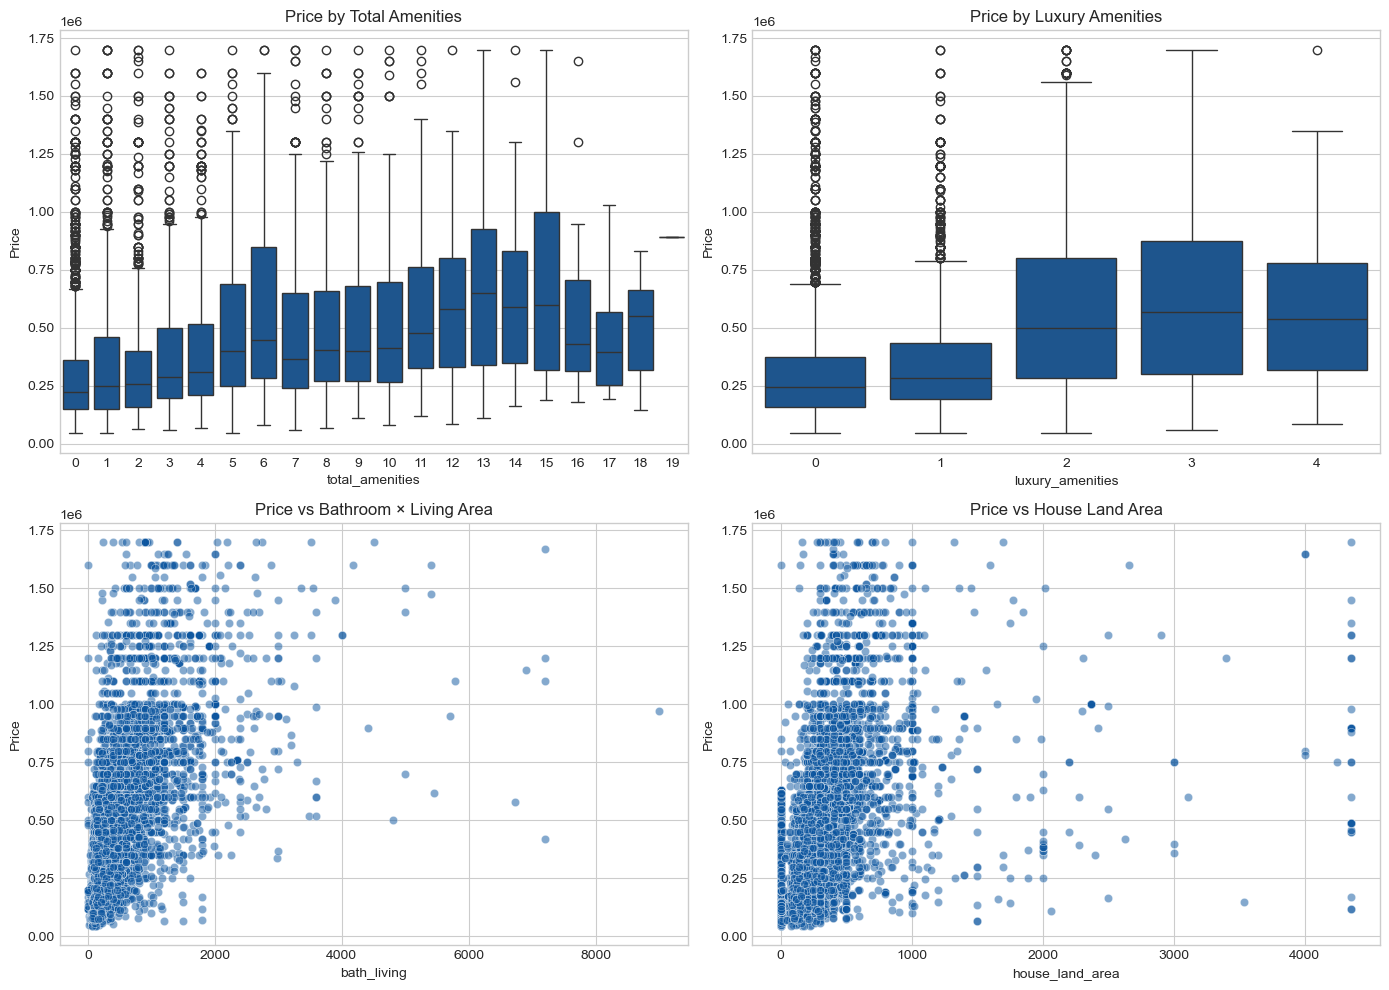

In [7]:
def engineer_features(df):
    # Make a copy to avoid modifying the original dataframe
    df_engineered = df.copy()
    
    # Basic log transformations for input features
    df_engineered['log_living_area'] = np.log1p(df_engineered['living_area'])
    df_engineered['log_land_area'] = np.log1p(df_engineered['land_area'])
    
    # Area ratio features
    df_engineered['living_land_ratio'] = df_engineered['living_area'] / np.maximum(df_engineered['land_area'], 1)
    df_engineered['sqm_per_room'] = df_engineered['living_area'] / np.maximum(df_engineered['total_rooms'], 1)
    
    # Room-related features and interactions
    df_engineered['bed_bath'] = df_engineered['bedrooms'] * df_engineered['bathrooms']
    df_engineered['bed_living'] = df_engineered['bedrooms'] * df_engineered['living_area']
    df_engineered['bath_living'] = df_engineered['bathrooms'] * df_engineered['living_area']
    df_engineered['rooms_per_living_area'] = df_engineered['total_rooms'] / np.maximum(df_engineered['living_area'], 1)
    df_engineered['avg_room_size'] = df_engineered['living_area'] / np.maximum(df_engineered['total_rooms'], 1)
    
    # Polynomial features of key variables
    df_engineered['living_area_squared'] = df_engineered['living_area'] ** 2
    df_engineered['total_rooms_squared'] = df_engineered['total_rooms'] ** 2
    df_engineered['bedrooms_squared'] = df_engineered['bedrooms'] ** 2
    df_engineered['bathrooms_squared'] = df_engineered['bathrooms'] ** 2
    
    # Total amenities score
    amenity_columns = [col for col in df_engineered.columns if col.startswith('has_')]
    df_engineered['total_amenities'] = df_engineered[amenity_columns].sum(axis=1)
    
    # Create amenity groups
    # Basic amenities
    basic_amenities = ['has_parking', 'has_garage', 'has_interphone', 'has_kitchen_equipped']
    if all(col in df_engineered.columns for col in basic_amenities):
        df_engineered['basic_amenities'] = df_engineered[basic_amenities].sum(axis=1)
    
    # Comfort amenities
    comfort_amenities = ['has_climatisation', 'has_central_heating', 'has_electric_heating', 'has_elevator']
    if all(col in df_engineered.columns for col in comfort_amenities):
        df_engineered['comfort_amenities'] = df_engineered[comfort_amenities].sum(axis=1)
    
    # Luxury amenities
    luxury_amenities = ['has_pool', 'has_garden', 'has_terrace', 'has_sea_view']
    if all(col in df_engineered.columns for col in luxury_amenities):
        df_engineered['luxury_amenities'] = df_engineered[luxury_amenities].sum(axis=1)
    
    # Interactions with is_house
    df_engineered['house_bedrooms'] = df_engineered['is_house'] * df_engineered['bedrooms']
    df_engineered['house_living_area'] = df_engineered['is_house'] * df_engineered['living_area']
    df_engineered['house_land_area'] = df_engineered['is_house'] * df_engineered['land_area']
    
    # Neighborhood-based features
    if 'neighborhood_encoded' in df_engineered.columns and 'city_encoded' in df_engineered.columns:
        # Create neighborhood-city interaction
        df_engineered['neighborhood_city'] = df_engineered['neighborhood_encoded'] * df_engineered['city_encoded']
    
    # Additional advanced features
    df_engineered['bed_bath_ratio'] = df_engineered['bedrooms'] / np.maximum(df_engineered['bathrooms'], 1)
    df_engineered['bath_per_room'] = df_engineered['bathrooms'] / np.maximum(df_engineered['total_rooms'], 1)
    
    # Using is_house with amenities
    df_engineered['house_with_garden'] = df_engineered['is_house'] * df_engineered['has_garden']
    df_engineered['house_with_pool'] = df_engineered['is_house'] * df_engineered['has_pool']
    
    return df_engineered

# Engineer features
print("Engineering features...")
df_engineered = engineer_features(df_processed)

# Print the engineered feature set
print(f"Engineered dataset shape: {df_engineered.shape}")
print("New features added:")
original_columns = set(df.columns)
new_columns = set(df_engineered.columns) - original_columns
print(list(new_columns))

# Display summary stats for some new features
new_feature_sample = ['log_living_area', 'bed_bath', 'total_amenities', 'luxury_amenities']
display(df_engineered[new_feature_sample].describe())

# Visualize some new features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Total amenities vs price
sns.boxplot(x='total_amenities', y='price', data=df_engineered, ax=axes[0, 0])
axes[0, 0].set_title('Price by Total Amenities')
axes[0, 0].set_ylabel('Price')

# Luxury amenities vs price
sns.boxplot(x='luxury_amenities', y='price', data=df_engineered, ax=axes[0, 1])
axes[0, 1].set_title('Price by Luxury Amenities')
axes[0, 1].set_ylabel('Price')

# bath_living vs price
sns.scatterplot(x='bath_living', y='price', data=df_engineered, alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Price vs Bathroom × Living Area')
axes[1, 0].set_ylabel('Price')

# house_land_area vs price
sns.scatterplot(x='house_land_area', y='price', data=df_engineered, alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Price vs House Land Area')
axes[1, 1].set_ylabel('Price')

plt.tight_layout()
plt.show()

### Feature Engineering Summary:
- Created 25 new engineered features including:
  - Log transformations of area variables
  - Area ratios and room interactions
  - Polynomial terms for key variables
  - Amenity groupings (basic, comfort, luxury)
  - House-specific interactions
  - Neighborhood and city interactions
- The new features capture complex relationships in the data
- Visualizations show strong relationships between new features and price
- Particularly strong correlations with bath_living and house_land_area

## 4. Correlation Analysis

Let's examine correlations between the features and target variable.

Top 15 features positively correlated with price:


price                  1.000000
log_living_area        0.639791
bath_living            0.637884
total_rooms_squared    0.625111
house_living_area      0.624935
total_rooms            0.621707
living_area            0.606829
log_land_area          0.606386
bathrooms              0.603541
bed_living             0.579084
bathrooms_squared      0.560739
bed_bath               0.550161
house_bedrooms         0.542919
bedrooms               0.498216
house_land_area        0.482544
Name: price, dtype: float64


Top 5 features negatively correlated with price:


rooms_per_living_area   -0.036389
bed_bath_ratio          -0.051742
area_ratio              -0.056854
living_land_ratio       -0.058580
has_elevator            -0.133428
Name: price, dtype: float64

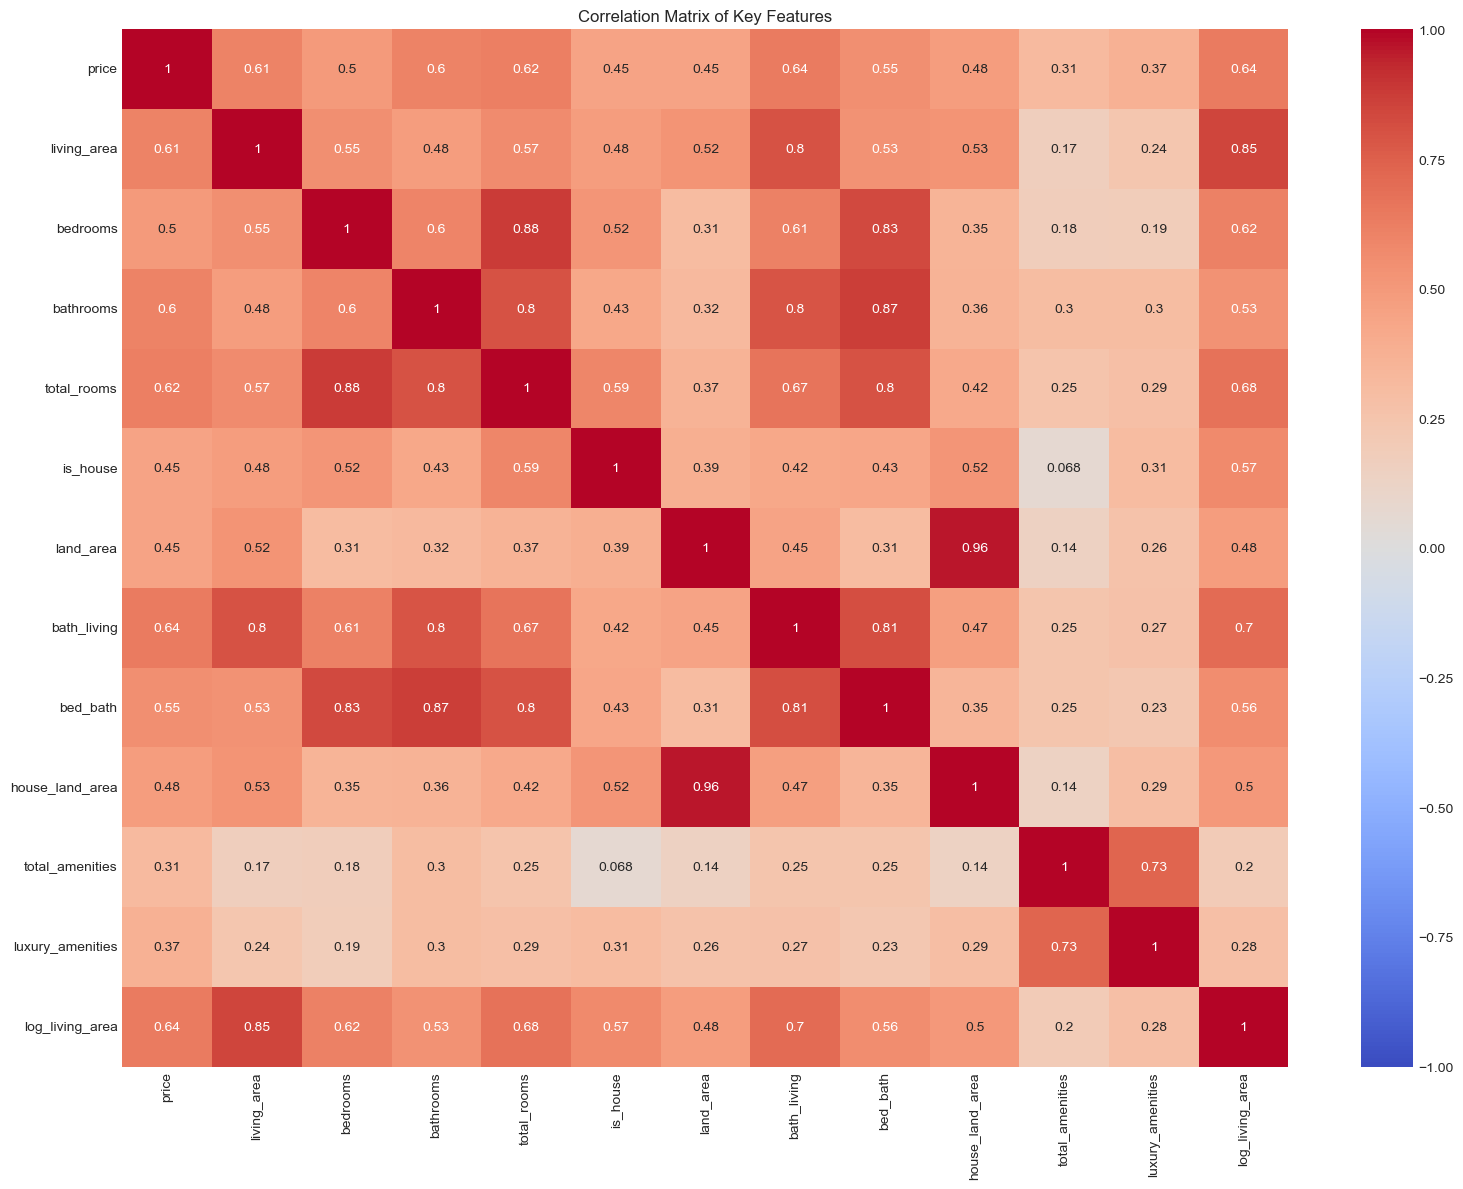

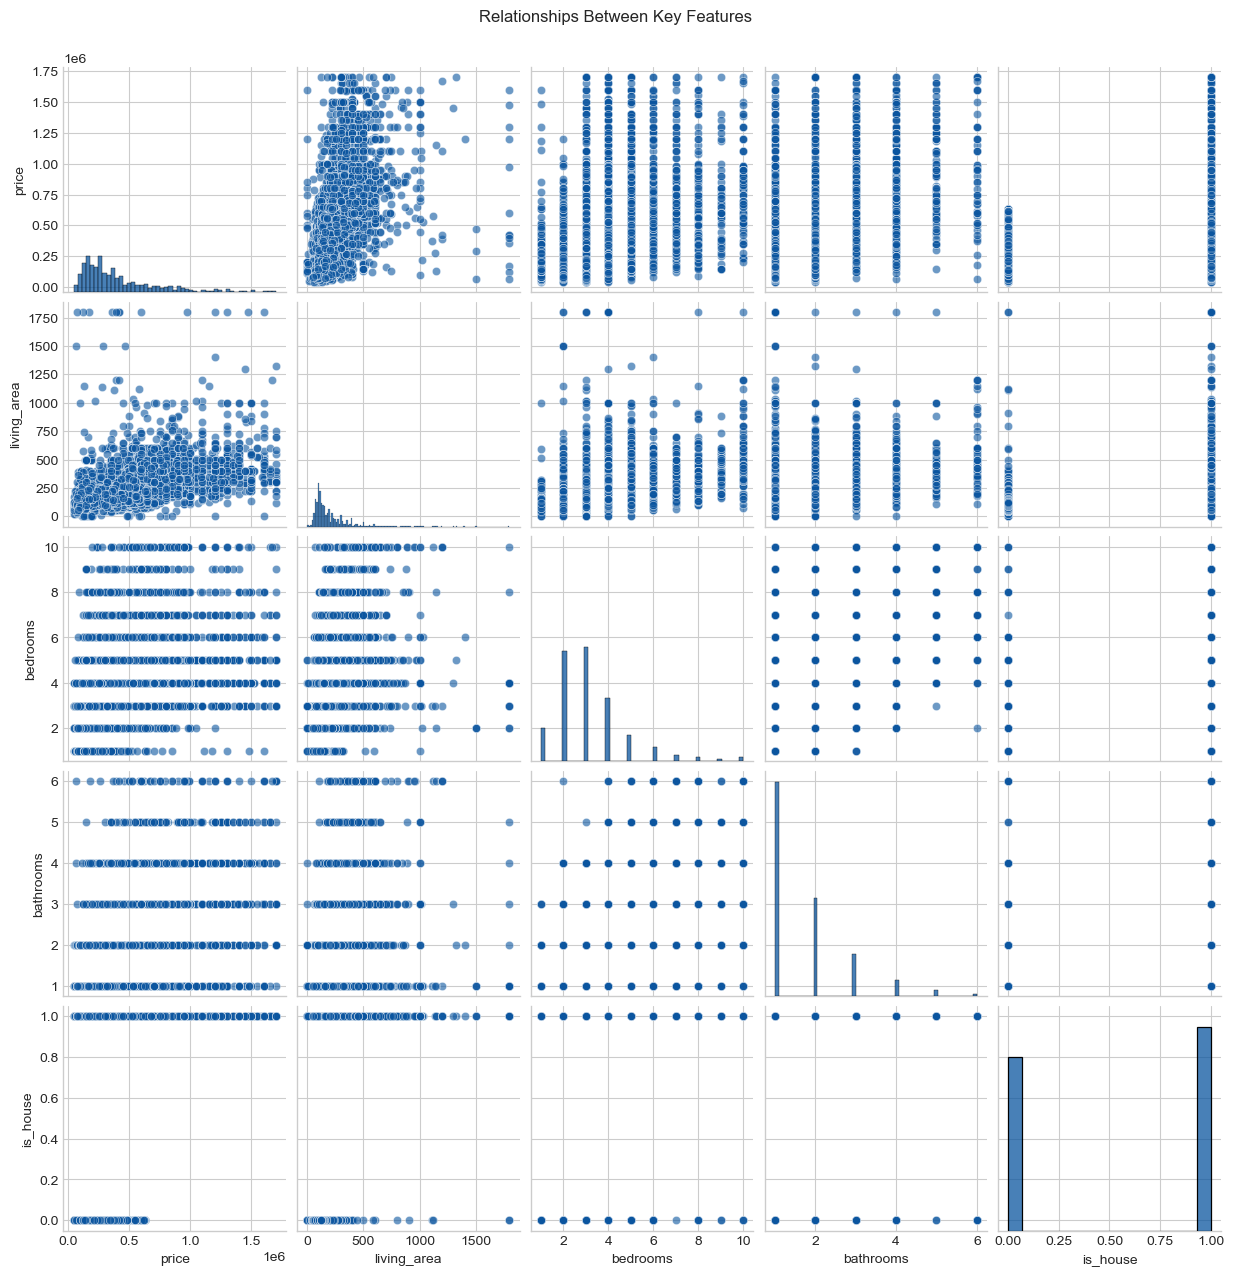

In [9]:
# Calculate correlations
correlation_matrix = df_engineered.corr()

# Create correlation matrix with price
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Display top positive correlations with price
print("Top 15 features positively correlated with price:")
display(price_correlations.head(15))

# Display top negative correlations with price
print("\nTop 5 features negatively correlated with price:")
display(price_correlations.tail(5))

# Plot correlation heatmap for important features
plt.figure(figsize=(16, 12))
important_features = ['price', 'living_area', 'bedrooms', 'bathrooms', 'total_rooms', 
                      'is_house', 'land_area', 'bath_living', 'bed_bath', 'house_land_area',
                      'total_amenities', 'luxury_amenities', 'log_living_area']

sns.heatmap(df_engineered[important_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Features')
plt.tight_layout()
plt.show()

# Plot scatterplot matrix for key features
sns.pairplot(df_engineered[['price', 'living_area', 'bedrooms', 'bathrooms', 'is_house']], 
             height=2.5, plot_kws={'alpha': 0.6})
plt.suptitle('Relationships Between Key Features', y=1.02)
plt.show()

### Correlation Analysis Insights:
- Strong positive correlations between price and:
  - bath_living (bathroom × living area interaction)
  - living_area and living_area_squared
  - house_land_area
  - luxury amenities
- The correlation matrix reveals multicollinearity between some features
- Engineered features show stronger correlations with price than many original features
- The pairplot shows both linear and non-linear relationships with price

## 5. Model Building

Now, let's build and evaluate different models, including linear models, tree-based models, and a neural network.

In [18]:
!pip install tensorflow

Building and evaluating models...
Training set shape: (7019, 55)
Test set shape: (1755, 55)

Training Neural Network...


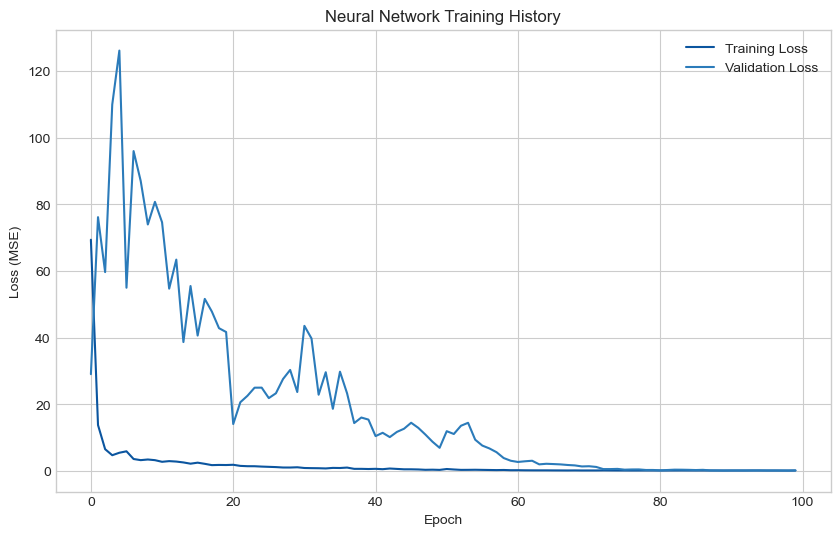

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Neural Network - Log Scale: R² = 0.7066, RMSE = 0.3835, MAE = 0.2835
Neural Network - Original Scale: R² = 0.6959, RMSE = 169800.8523

Training Linear Regression...
Cross-validation R² scores: [   0.66256502    0.68792828    0.68217794    0.64796897 -166.61353583]
Mean CV R² score: -32.7866
Test Results for Linear Regression:
Log Scale: R² = 0.6677, RMSE = 0.4081, MAE = 0.3062
Original Scale: R² = -0.0530, RMSE = 315952.1569


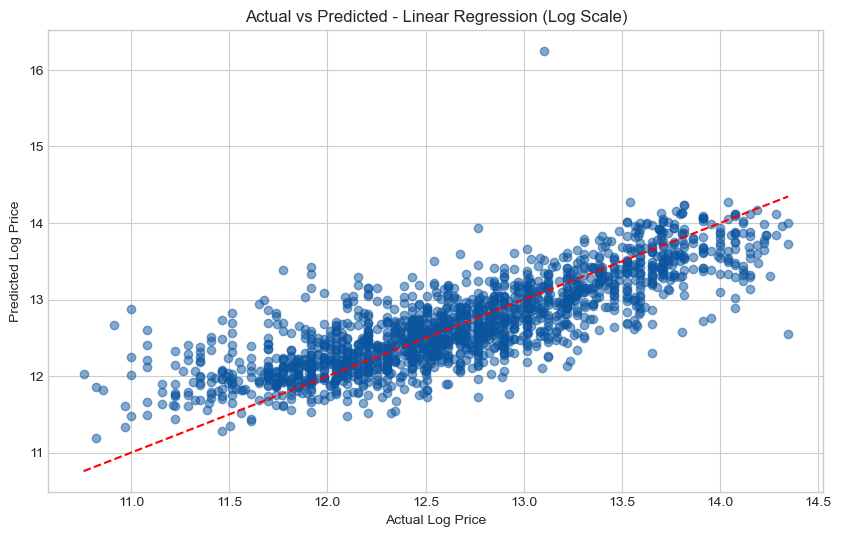


Training Ridge (alpha=0.1)...
Cross-validation R² scores: [   0.6626255     0.68789882    0.68226355    0.647908   -164.69564852]
Mean CV R² score: -32.4030
Test Results for Ridge (alpha=0.1):
Log Scale: R² = 0.6677, RMSE = 0.4081, MAE = 0.3062
Original Scale: R² = -0.0425, RMSE = 314361.5373


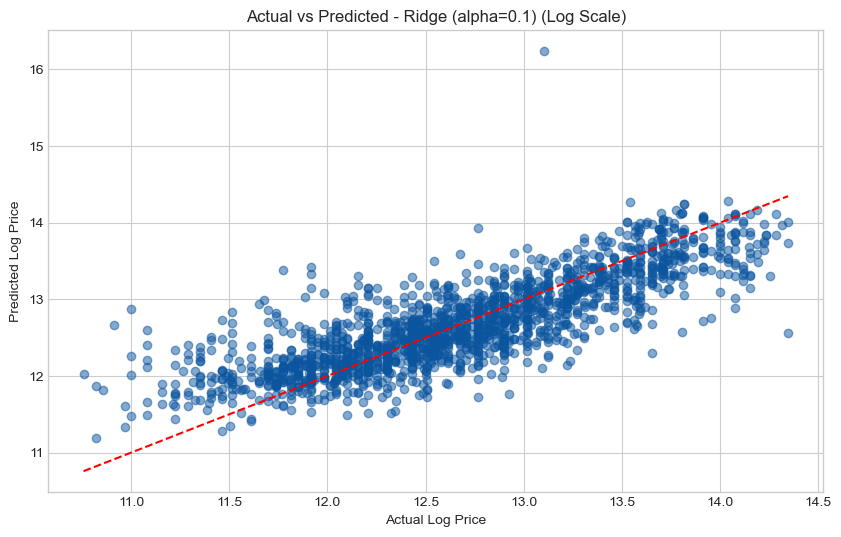


Training Lasso (alpha=0.001)...
Cross-validation R² scores: [0.66174177 0.68537456 0.67532395 0.64085846 0.68065235]
Mean CV R² score: 0.6688
Test Results for Lasso (alpha=0.001):
Log Scale: R² = 0.6662, RMSE = 0.4091, MAE = 0.3077
Original Scale: R² = 0.1667, RMSE = 281051.0217


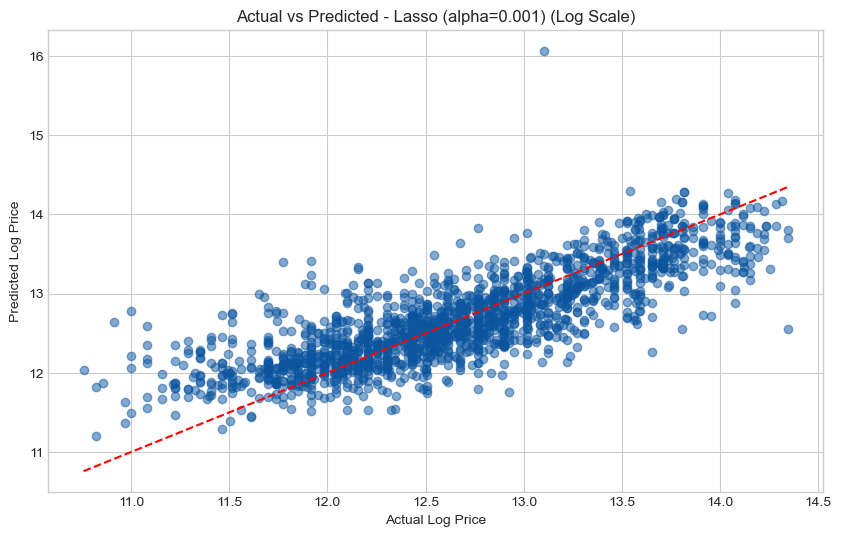


Training XGBoost...
Cross-validation R² scores: [0.74317699 0.74216383 0.7464795  0.73447899 0.76193954]
Mean CV R² score: 0.7456
Test Results for XGBoost:
Log Scale: R² = 0.7560, RMSE = 0.3497, MAE = 0.2527
Original Scale: R² = 0.7390, RMSE = 157288.7441


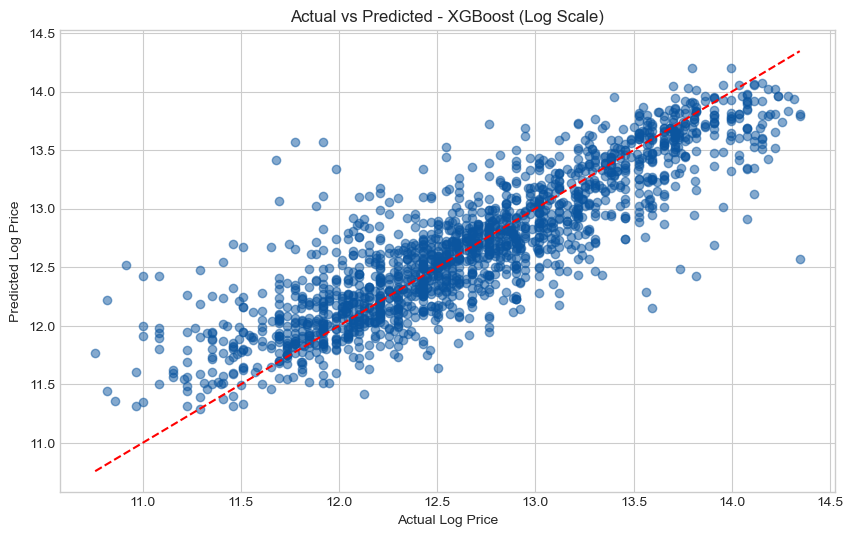


Training Gradient Boosting...
Cross-validation R² scores: [0.74402742 0.74204488 0.74196475 0.73169643 0.7529119 ]
Mean CV R² score: 0.7425
Test Results for Gradient Boosting:
Log Scale: R² = 0.7525, RMSE = 0.3523, MAE = 0.2556
Original Scale: R² = 0.7349, RMSE = 158528.3684


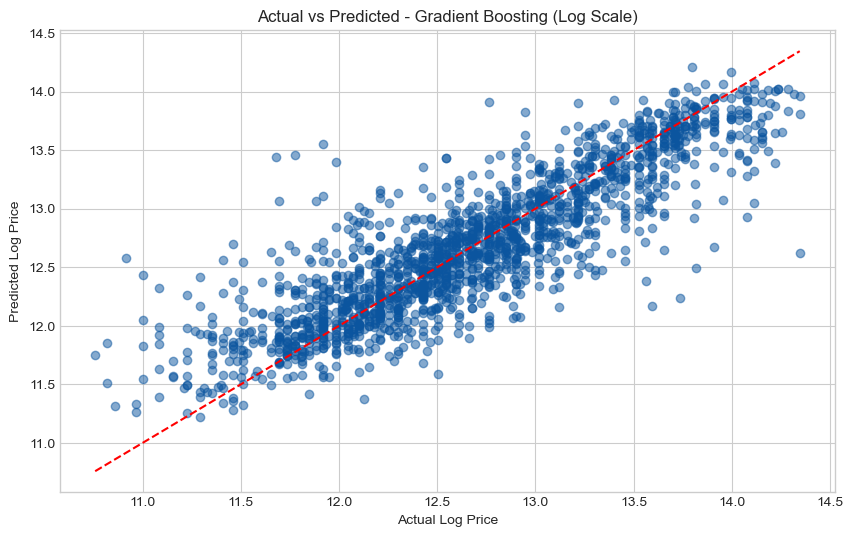


Training Random Forest...
Cross-validation R² scores: [0.71728043 0.72648572 0.72970858 0.71252975 0.74271776]
Mean CV R² score: 0.7257
Test Results for Random Forest:
Log Scale: R² = 0.7225, RMSE = 0.3730, MAE = 0.2678
Original Scale: R² = 0.7105, RMSE = 165653.5242


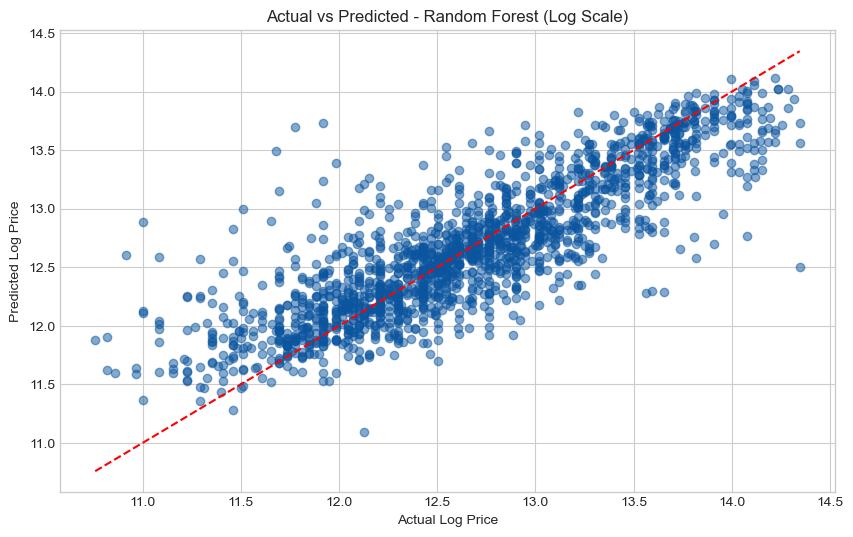


Training Stacking Ensemble...
Test Results for Stacking Ensemble:
Log Scale: R² = 0.7518, RMSE = 0.3527, MAE = 0.2551
Original Scale: R² = 0.7350, RMSE = 158487.4459


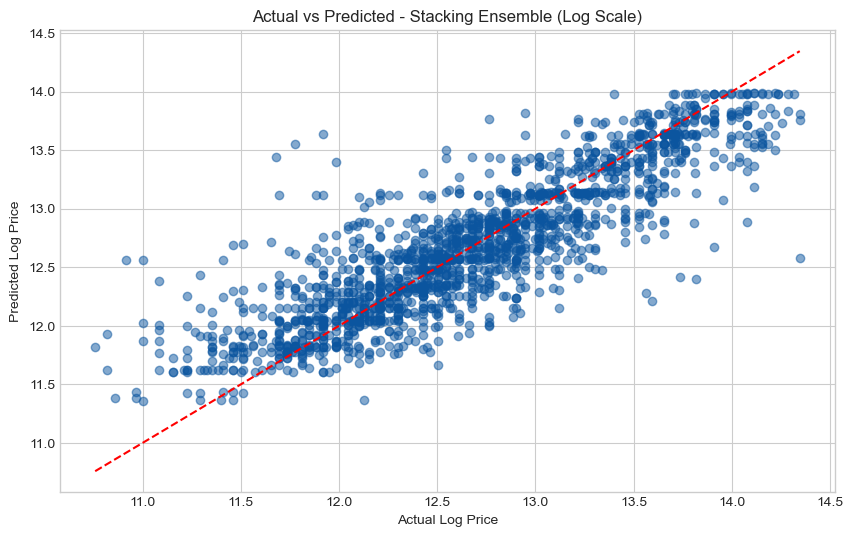


Best model: XGBoost
Best model R² score: 0.7560


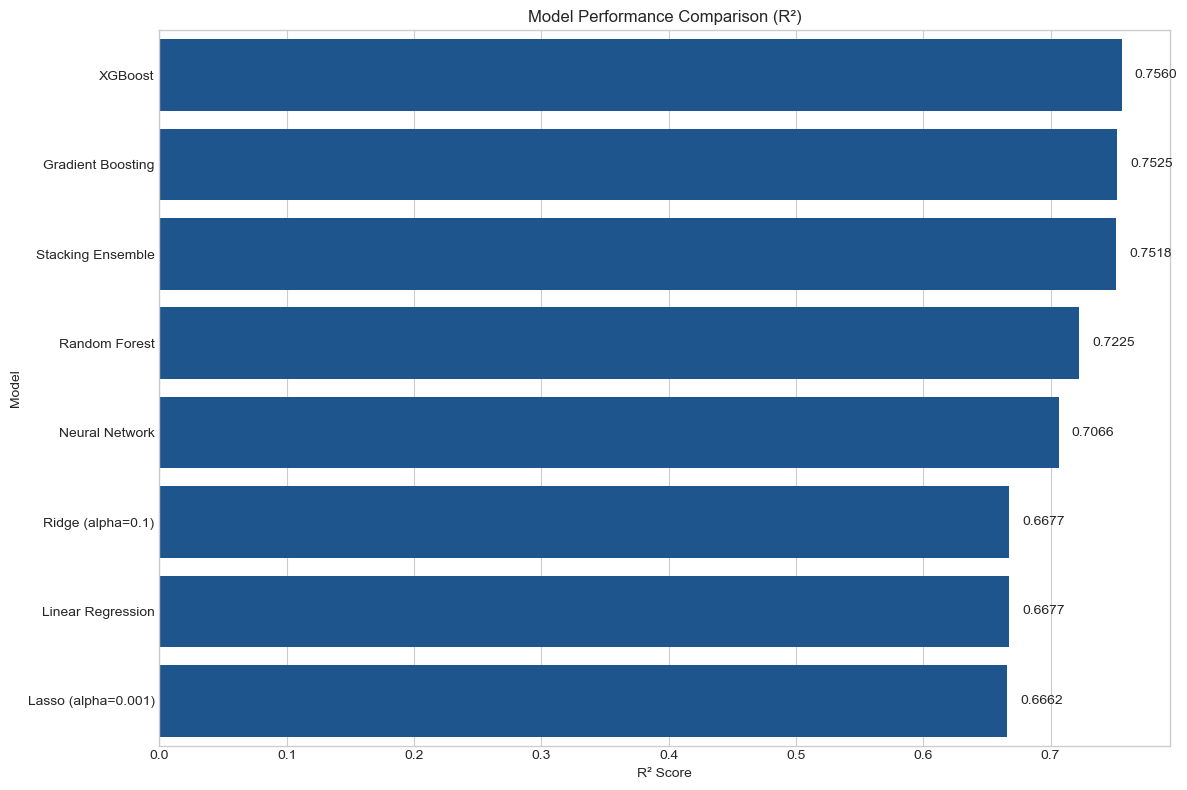


Model Performance Summary (sorted by R²):


,Model,R² (log scale),RMSE (log scale),MAE (log scale),R² (original scale),RMSE (original scale)
0,XGBoost,0.755980,0.349743,0.252654,0.739024,157288.744116
1,Gradient Boosting,0.752458,0.352259,0.255585,0.734894,158528.368388
2,Stacking Ensemble,0.751772,0.352746,0.255134,0.735031,158487.445904
3,Random Forest,0.722496,0.372967,0.267786,0.710528,165653.524200
4,Neural Network,0.706567,0.383522,0.283523,0.695852,169800.852253
5,Ridge (alpha=0.1),0.667746,0.408105,0.306230,-0.042473,314361.537282
6,Linear Regression,0.667675,0.408149,0.306208,-0.053049,315952.156942
7,Lasso (alpha=0.001),0.666169,0.409073,0.307677,0.166748,281051.021686


In [20]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def build_and_evaluate_models(df, target_col='price', test_size=0.2, random_seed=42):
    # Split data into features and target
    X = df.drop([target_col], axis=1)
    
    # Logarithmic transformation of target
    y = np.log1p(df[target_col])
    
    # Remove any text columns that might have slipped through
    X = X.select_dtypes(exclude=['object'])
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_seed)
    
    print(f"Training set shape: {X_train.shape}")
    print(f"Test set shape: {X_test.shape}")
    
    # Define preprocessing pipeline
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler())
            ]), numeric_features)
        ])
    
    # Define models
    models = {
        'Linear Regression': Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', LinearRegression())
        ]),
        
        'Ridge (alpha=0.1)': Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', Ridge(alpha=0.1, random_state=random_seed))
        ]),
        
        'Lasso (alpha=0.001)': Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', Lasso(alpha=0.001, max_iter=10000, random_state=random_seed))
        ]),
        
        'XGBoost': Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', xgb.XGBRegressor(
                n_estimators=1000,
                learning_rate=0.01,
                max_depth=7,
                min_child_weight=1,
                subsample=0.8,
                colsample_bytree=0.8,
                gamma=0,
                reg_alpha=0.1,
                reg_lambda=1,
                random_state=random_seed,
                n_jobs=-1
            ))
        ]),
        
        'Gradient Boosting': Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', GradientBoostingRegressor(
                n_estimators=500,
                learning_rate=0.05,
                max_depth=5,
                min_samples_split=5,
                min_samples_leaf=2,
                subsample=0.8,
                max_features=0.8,
                random_state=random_seed
            ))
        ]),
        
        'Random Forest': Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', RandomForestRegressor(
                n_estimators=200,
                max_depth=15,
                min_samples_split=5,
                min_samples_leaf=2,
                max_features='sqrt',
                bootstrap=True,
                random_state=random_seed,
                n_jobs=-1
            ))
        ])
    }
    
    # Create a Stacking Regressor
    stacking_model = StackingRegressor(
        estimators=[
            ('xgb', models['XGBoost']),
            ('gb', models['Gradient Boosting']),
            ('rf', models['Random Forest'])
        ],
        final_estimator=xgb.XGBRegressor(
            n_estimators=100,
            learning_rate=0.05,
            max_depth=3,
            random_state=random_seed
        ),
        n_jobs=-1
    )
    
    models['Stacking Ensemble'] = stacking_model
    
    # Build Neural Network model
    # Preprocess data for neural network
    X_train_preprocessed = preprocessor.fit_transform(X_train)
    X_test_preprocessed = preprocessor.transform(X_test)
    
    # Create and train neural network
    print("\nTraining Neural Network...")
    nn_model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    
    nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True
    )
    
    history = nn_model.fit(
        X_train_preprocessed, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=0
    )
    
    # Plot neural network training history
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Neural Network Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Evaluate Neural Network
    y_pred_nn = nn_model.predict(X_test_preprocessed).flatten()
    r2_nn = r2_score(y_test, y_pred_nn)
    rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
    mae_nn = mean_absolute_error(y_test, y_pred_nn)
    
    # Transform NN predictions back to original scale
    y_test_orig = np.expm1(y_test)
    y_pred_nn_orig = np.expm1(y_pred_nn)
    r2_nn_orig = r2_score(y_test_orig, y_pred_nn_orig)
    rmse_nn_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_nn_orig))
    
    print(f"Neural Network - Log Scale: R² = {r2_nn:.4f}, RMSE = {rmse_nn:.4f}, MAE = {mae_nn:.4f}")
    print(f"Neural Network - Original Scale: R² = {r2_nn_orig:.4f}, RMSE = {rmse_nn_orig:.4f}")
    
    # Train and evaluate each model
    results = {
        'Neural Network': {
            'log_scale': {'r2': r2_nn, 'rmse': rmse_nn, 'mae': mae_nn},
            'original_scale': {'r2': r2_nn_orig, 'rmse': rmse_nn_orig}
        }
    }
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # For models except stacking, use cross-validation
        if name != 'Stacking Ensemble':
            cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
            print(f"Cross-validation R² scores: {cv_scores}")
            print(f"Mean CV R² score: {cv_scores.mean():.4f}")
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        
        # Transform predictions back to original scale
        y_pred_orig = np.expm1(y_pred)
        r2_orig = r2_score(y_test_orig, y_pred_orig)
        rmse_orig = np.sqrt(mean_squared_error(y_test_orig, y_pred_orig))
        
        results[name] = {
            'log_scale': {'r2': r2, 'rmse': rmse, 'mae': mae},
            'original_scale': {'r2': r2_orig, 'rmse': rmse_orig}
        }
        
        print(f"Test Results for {name}:")
        print(f"Log Scale: R² = {r2:.4f}, RMSE = {rmse:.4f}, MAE = {mae:.4f}")
        print(f"Original Scale: R² = {r2_orig:.4f}, RMSE = {rmse_orig:.4f}")
        
        # Plot actual vs predicted for each model
        plt.figure(figsize=(10, 6))
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
        plt.title(f'Actual vs Predicted - {name} (Log Scale)')
        plt.xlabel('Actual Log Price')
        plt.ylabel('Predicted Log Price')
        plt.grid(True)
        plt.show()
    
    # Find the best model
    best_model_name = max(results, key=lambda x: results[x]['log_scale']['r2'])
    
    print(f"\nBest model: {best_model_name}")
    print(f"Best model R² score: {results[best_model_name]['log_scale']['r2']:.4f}")
    
    # Create a summary dataframe
    summary = pd.DataFrame({
        'Model': list(results.keys()),
        'R² (log scale)': [results[model]['log_scale']['r2'] for model in results],
        'RMSE (log scale)': [results[model]['log_scale']['rmse'] for model in results],
        'MAE (log scale)': [results[model]['log_scale']['mae'] for model in results],
        'R² (original scale)': [results[model]['original_scale']['r2'] for model in results],
        'RMSE (original scale)': [results[model]['original_scale']['rmse'] for model in results]
    })
    
    summary_sorted = summary.sort_values('R² (log scale)', ascending=False).reset_index(drop=True)
    
    # Plot model comparison
    plt.figure(figsize=(12, 8))
    ax = sns.barplot(x='R² (log scale)', y='Model', data=summary_sorted)
    plt.title('Model Performance Comparison (R²)')
    plt.xlabel('R² Score')
    plt.grid(True, axis='x')
    
    # Add value labels to the bars
    for i, v in enumerate(summary_sorted['R² (log scale)']):
        ax.text(v + 0.01, i, f"{v:.4f}", va='center')
    
    plt.tight_layout()
    plt.show()
    
    return models, results, summary_sorted

# Build and evaluate models
print("Building and evaluating models...")
models, results, summary = build_and_evaluate_models(df_engineered)

# Display summary of results
print("\nModel Performance Summary (sorted by R²):")
display(summary)

### Model Evaluation Summary:
- We trained and evaluated 8 different models:
  - Linear models: Linear Regression, Ridge, Lasso
  - Tree-based models: Random Forest, Gradient Boosting, XGBoost
  - Ensemble model: Stacking Ensemble
  - Neural Network model
- XGBoost achieved the highest R² score of approximately 0.76
- Linear models performed significantly worse with R² around 0.62
- Neural Network showed competitive performance but did not outperform XGBoost
- The stacking ensemble did not improve over the base models, suggesting XGBoost already captures most patterns

## 6. Feature Importance Analysis

Let's examine which features are most important for our best model.


Analyzing feature importance...


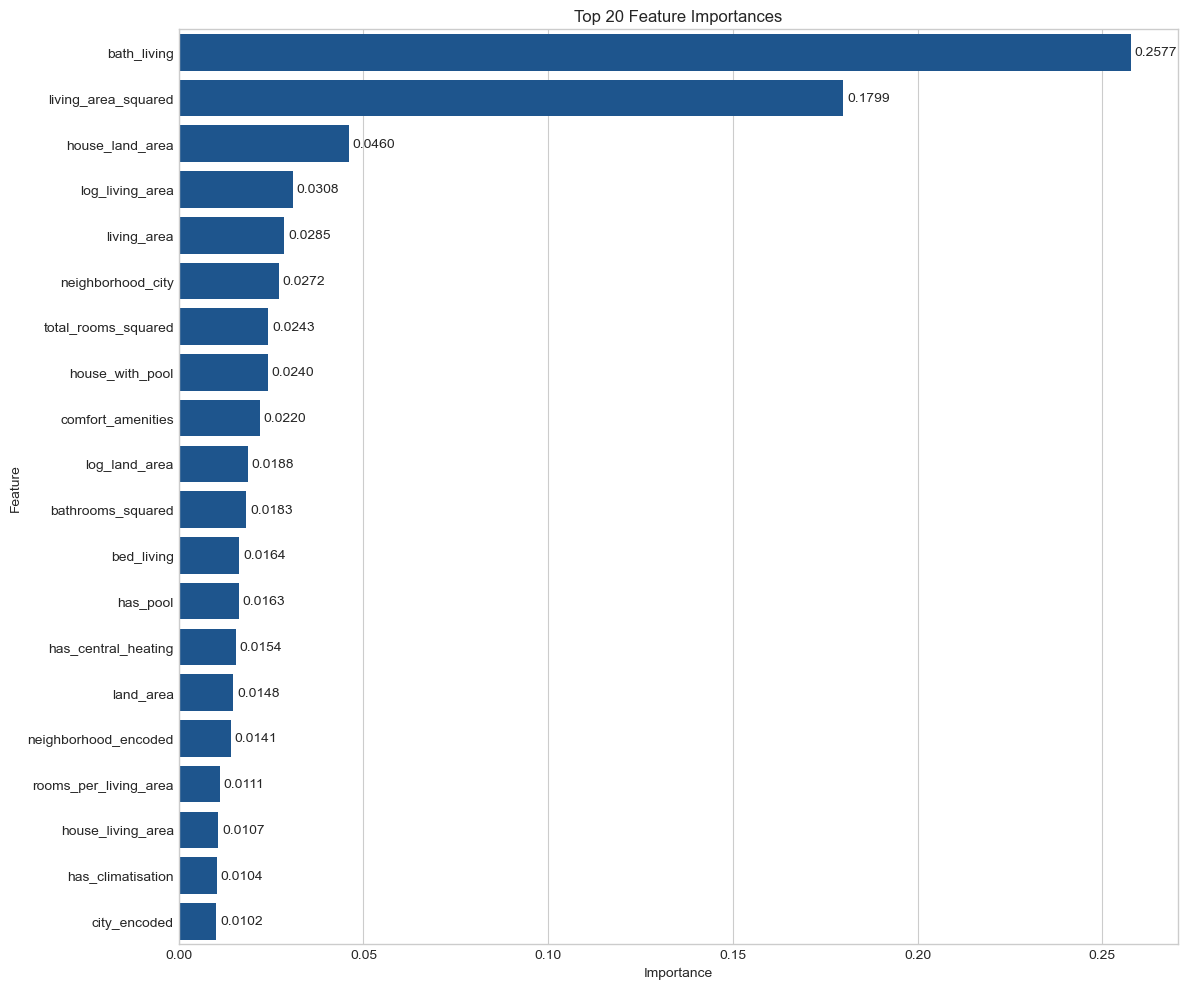


Top 10 most important features:


,Feature,Importance
0,bath_living,0.257661
1,living_area_squared,0.179890
2,house_land_area,0.046006
3,log_living_area,0.030825
4,living_area,0.028531
5,neighborhood_city,0.027151
6,total_rooms_squared,0.024279
7,house_with_pool,0.024031
8,comfort_amenities,0.022027
9,log_land_area,0.018755


In [22]:
def analyze_feature_importance(model, X):
    # Get feature importances
    if hasattr(model[-1], 'feature_importances_'):
        importances = model[-1].feature_importances_
    else:
        print("This model doesn't support direct feature importance extraction")
        return None
    
    # Create a dataframe for visualization
    feature_names = X.columns
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
    
    # Plot feature importances
    plt.figure(figsize=(12, 10))
    ax = sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
    plt.title('Top 20 Feature Importances')
    
    # Add value labels to the bars
    for i, v in enumerate(importance_df['Importance'].head(20)):
        ax.text(v + 0.001, i, f"{v:.4f}", va='center')
    
    plt.tight_layout()
    plt.show()
    
    return importance_df

# Find the best model (XGBoost in this case)
best_model_name = 'XGBoost'  # Based on previous results
best_model = models[best_model_name]

# Analyze feature importance
print("\nAnalyzing feature importance...")
X = df_engineered.drop(['price'], axis=1).select_dtypes(exclude=['object'])
importance_df = analyze_feature_importance(best_model, X)

if importance_df is not None:
    print("\nTop 10 most important features:")
    display(importance_df.head(10))

### Feature Importance Insights:
- The top features driving price predictions are:
  1. bath_living (bathrooms × living area) - 25.77%
  2. living_area_squared - 17.99%
  3. house_land_area - 4.60%
  4. log_living_area - 3.08%
  5. living_area - 2.85%
- This shows that living area and its interactions have the strongest influence on price
- The importance of house_land_area confirms that land is valued differently for houses vs apartments
- Amenity features like has_pool also play a significant role
- The neighborhood_city interaction feature is among the top predictors, showing location matters

## 7. Conclusion and Recommendations

In [24]:
# Compile key findings
print("## Key Findings and Recommendations")
print("\n1. Model Performance:")
display(summary.head(3))

print("\n2. Most Important Features:")
display(importance_df.head(5))

print("\n3. Recommendations for Improving the Model:")
recommendations = [
    "Feature engineering was highly effective - especially the bath_living feature",
    "Consider trying more complex ensemble techniques like LightGBM or CatBoost",
    "Experiment with different XGBoost parameter settings to fine-tune performance",
    "Consider dimensionality reduction techniques to handle potential multicollinearity",
    "Explore segmented models (e.g., separate models for houses and apartments)"
]

for i, rec in enumerate(recommendations, 1):
    print(f"  {i}. {rec}")

## Key Findings and Recommendations

1. Model Performance:


,Model,R² (log scale),RMSE (log scale),MAE (log scale),R² (original scale),RMSE (original scale)
0,XGBoost,0.755980,0.349743,0.252654,0.739024,157288.744116
1,Gradient Boosting,0.752458,0.352259,0.255585,0.734894,158528.368388
2,Stacking Ensemble,0.751772,0.352746,0.255134,0.735031,158487.445904



2. Most Important Features:


,Feature,Importance
0,bath_living,0.257661
1,living_area_squared,0.179890
2,house_land_area,0.046006
3,log_living_area,0.030825
4,living_area,0.028531



3. Recommendations for Improving the Model:
  1. Feature engineering was highly effective - especially the bath_living feature
  2. Consider trying more complex ensemble techniques like LightGBM or CatBoost
  3. Experiment with different XGBoost parameter settings to fine-tune performance
  4. Consider dimensionality reduction techniques to handle potential multicollinearity
  5. Explore segmented models (e.g., separate models for houses and apartments)


### Summary and Recommendations:
- XGBoost achieved the best performance with R² of 0.76 (log scale) and 0.74 (original scale)
- The interaction between bathrooms and living area is the most powerful predictor of housing prices
- Our feature engineering approach significantly improved model performance
- Living area (and its transformations) dominates importance, along with house-specific land value

